In [153]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import random

In [154]:
import warnings
warnings.filterwarnings('ignore')

In [155]:
plt.rcParams["figure.figsize"] = (8,6)

In [156]:
def runge_kutta(function, iterations, initial, step):
    r_val = [initial[0]]
    phi_val = [initial[1]]
    t_val = [0]
    for i in range(round(iterations/step)):
        r1, phi1 = function(r_val[-1], phi_val[-1])
        r2, phi2 = function(r_val[-1]+step*r1/2, phi_val[-1]+step*phi1/2)
        r3, phi3 = function(r_val[-1]+step*r2/2, phi_val[-1]+step*phi2/2)
        r4, phi4 = function(r_val[-1]+step*r3, phi_val[-1]+step*phi3)
        
        r_val.append(r_val[-1]+step*(r1+2*r2+2*r3+r4)/6)
        phi_val.append(phi_val[-1]+step*(phi1+2*phi2+2*phi3+phi4)/6)
        t_val.append(t_val[-1]+step)
    return t_val, r_val, phi_val

In [157]:
def competing_species_stable(r, phi):
    return (r*(1-r*r), 1)

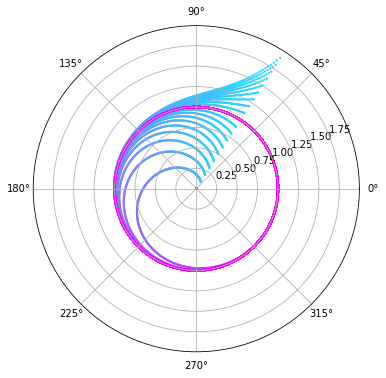

In [162]:
colormap = plt.get_cmap('cool')
norm = mpl.colors.Normalize(0.0, 2*np.pi)

for i in range(0, 10):
    t_val, r_val, phi_val = runge_kutta(competing_species_stable, 50, (i/10, 1), 0.01)
    ax = plt.subplot(1, 1, 1, polar=True)
    ax.scatter(phi_val, r_val, c=phi_val, s=5, cmap=colormap, norm=norm, linewidths=0)
    
    t_val, r_val, phi_val = runge_kutta(competing_species_stable, 50, (1 + i/10, 1), 0.01)
    ax = plt.subplot(1, 1, 1, polar=True)
    ax.scatter(phi_val, r_val, c=phi_val, s=5, cmap=colormap, norm=norm, linewidths=0)

In [163]:
def competing_species_unstable(r, phi):
    return (r*(r-1), 1)

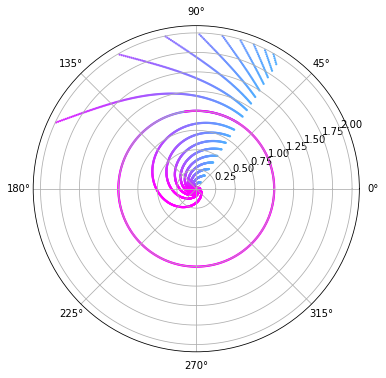

In [234]:
colormap = plt.get_cmap('cool')
norm = mpl.colors.Normalize(0.0, np.pi)

for i in range(0, 10):
    t_val, r_val, phi_val = runge_kutta(competing_species_unstable, 50, (i/10, 1), 0.01)
    ax = plt.subplot(1, 1, 1, polar=True)
    ax.scatter(phi_val, r_val, c=phi_val, s=5, cmap=colormap, norm=norm, linewidths=0)
    
    t_val, r_val, phi_val = runge_kutta(competing_species_unstable, 7, (1+i/10, 1), 0.01)
    r_val = np.array(r_val)[np.array(r_val) < 2]
    phi_val = np.array(phi_val[:len(r_val)])
    ax = plt.subplot(1, 1, 1, polar=True)
    ax.scatter(phi_val, r_val, c=phi_val, s=5, cmap=colormap, norm=norm, linewidths=0)

In [240]:
def competing_species_semistable(r, phi):
    return (r*np.abs(1-r), 1)

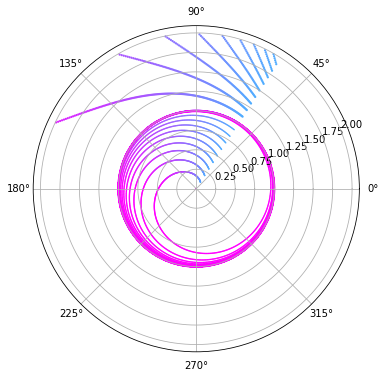

In [241]:
colormap = plt.get_cmap('cool')
norm = mpl.colors.Normalize(0.0, np.pi)

for i in range(0, 10):
    t_val, r_val, phi_val = runge_kutta(competing_species_semistable, 30, (i/10, 1), 0.01)
    ax = plt.subplot(1, 1, 1, polar=True)
    ax.scatter(phi_val, r_val, c=phi_val, s=2, cmap=colormap, norm=norm, linewidths=0)
    
    t_val, r_val, phi_val = runge_kutta(competing_species_semistable, 7, (1+i/10, 1), 0.01)
    r_val = np.array(r_val)[np.array(r_val) < 2]
    phi_val = np.array(phi_val[:len(r_val)])
    ax = plt.subplot(1, 1, 1, polar=True)
    ax.scatter(phi_val, r_val, c=phi_val, s=5, cmap=colormap, norm=norm, linewidths=0)